In [1]:
# STEP 1: Environment Setup and Data Loading
# Project Requirement: "Use anonymized transaction datasets."
# This section loads the dataset and shows its structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset (make sure creditcard.csv is in your working directory)
df = pd.read_csv('creditcard.csv')


In [3]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
# Display dataset details
print("Dataset Shape:", df.shape)

Dataset Shape: (284807, 31)


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [7]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [8]:
# STEP 2: Exploratory Data Analysis (EDA)
# --------------------------------------------------------------
# Project Requirement: Understand data distribution and imbalance.
# Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Check class distribution
print("\nClass Distribution:")
class_distribution = df['Class'].value_counts()
print(class_distribution)
print(f"\nFraud Percentage: {class_distribution[1]/len(df)*100:.4f}%")


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.1727%


Text(0, 0.5, 'Count')

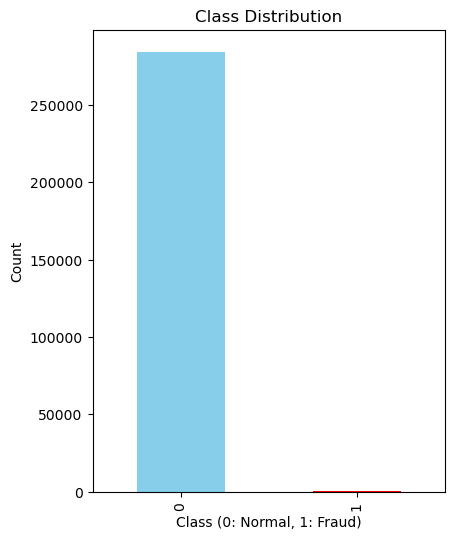

In [10]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')

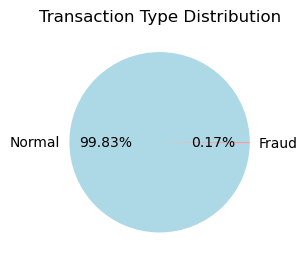

In [11]:
plt.subplot(1, 2, 2)
plt.pie(class_distribution, labels=['Normal', 'Fraud'], autopct='%1.2f%%', colors=['lightblue', 'lightcoral'])
plt.title('Transaction Type Distribution')
plt.show()

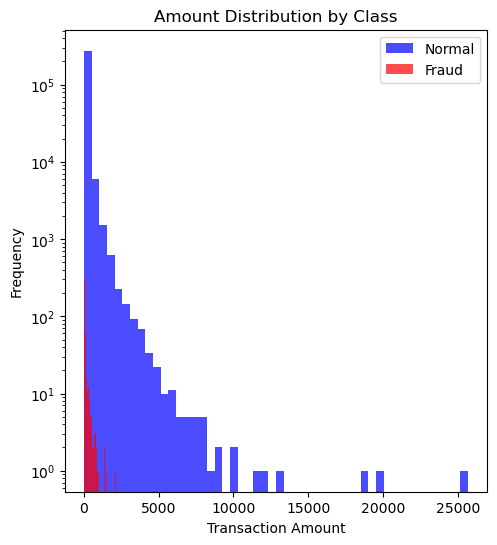

In [12]:
# Analyze Amount distribution for fraud vs normal transactions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Amount Distribution by Class')
plt.yscale('log')

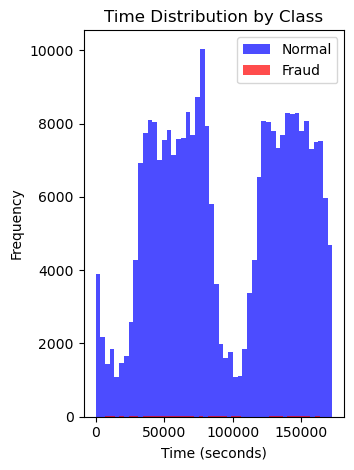

In [13]:
plt.subplot(1, 2, 2)
plt.hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.7, label='Normal', color='blue')
plt.hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Time Distribution by Class')
plt.tight_layout()
plt.show()

In [14]:
# STEP 3: Data Preprocessing

# Project Requirement: Prepare data for model training.
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']


In [15]:
# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [16]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (199364, 30)
Testing set size: (85443, 30)


In [17]:
# Scale the features (standardize)
scaler = StandardScaler()
columns_to_scale = [col for col in X_train.columns if col not in ['Time', 'Amount']]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [18]:
# STEP 4: Handle Class Imbalance

# Project Requirement: "Focus on class imbalance techniques."
print("Before SMOTE:")
print(f"Training set class distribution: {np.bincount(y_train)}")

Before SMOTE:
Training set class distribution: [199020    344]


In [19]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(f"Training set class distribution: {np.bincount(y_train_balanced)}")


After SMOTE:
Training set class distribution: [199020 199020]


In [20]:
# STEP 5: Isolation Forest (Anomaly Detection)

# Project Requirement: "Perform anomaly detection (Isolation Forest)."
print("Training Isolation Forest Model...")


Training Isolation Forest Model...


In [21]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Expected fraud percentage
    random_state=42,
    verbose=1
)

In [22]:
# Fit on original imbalanced data
iso_forest.fit(X_train_scaled)

IsolationForest(contamination=0.01, random_state=42, verbose=1)

In [23]:
# Predict anomalies (-1 for anomalies, 1 for normal)
y_pred_iso = iso_forest.predict(X_test_scaled)

In [24]:
# Convert predictions to binary (0: normal, 1: fraud)
y_pred_iso_binary = [1 if x == -1 else 0 for x in y_pred_iso]


In [25]:
# Evaluate Isolation Forest
print("\nIsolation Forest Results:")
print(classification_report(y_test, y_pred_iso_binary))



Isolation Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.10      0.55      0.16       148

    accuracy                           0.99     85443
   macro avg       0.55      0.77      0.58     85443
weighted avg       1.00      0.99      0.99     85443



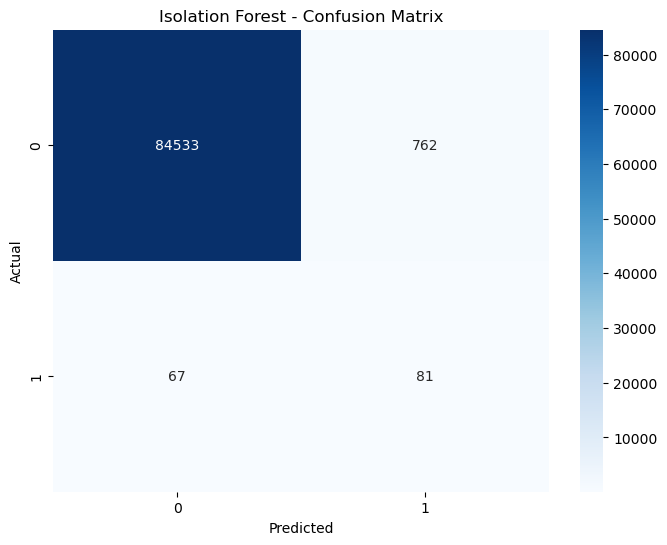

In [26]:
# Confusion Matrix
cm_iso = confusion_matrix(y_test, y_pred_iso_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues')
plt.title('Isolation Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
# STEP 6: Random Forest Classifier (Supervised Model)
# Project Requirement: "Compare anomaly detection with ML model."
print("Training Random Forest Classifier...")

Training Random Forest Classifier...


In [28]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    verbose=1
)

rf_model.fit(X_train_balanced, y_train_balanced)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.7min


RandomForestClassifier(class_weight='balanced', random_state=42, verbose=1)

In [33]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


In [34]:
# Evaluation
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))





Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



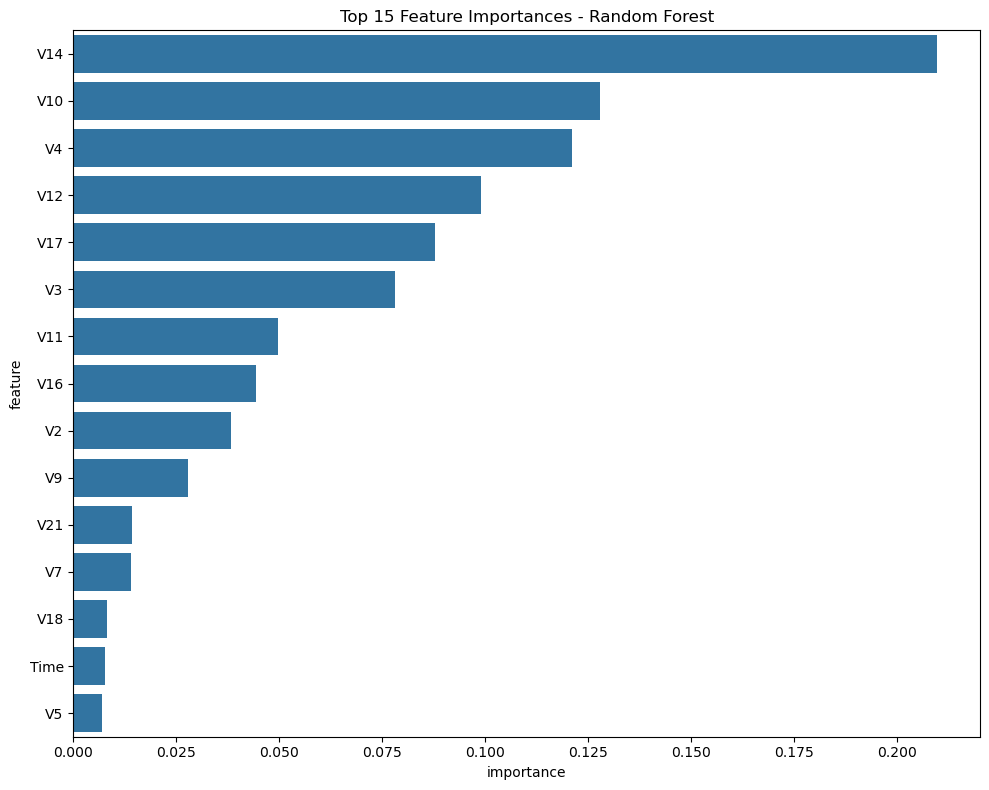

In [35]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [36]:
# STEP 7: Model Comparison

models_comparison = {
    'Isolation Forest': y_pred_iso_binary,
    'Random Forest': y_pred_rf
}

comparison_results = []
for model_name, predictions in models_comparison.items():
    comparison_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1-Score': f1_score(y_test, predictions)
    })

comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
              Model  Accuracy  Precision    Recall  F1-Score
0  Isolation Forest  0.990298   0.096085  0.547297  0.163471
1     Random Forest  0.999450   0.874074  0.797297  0.833922


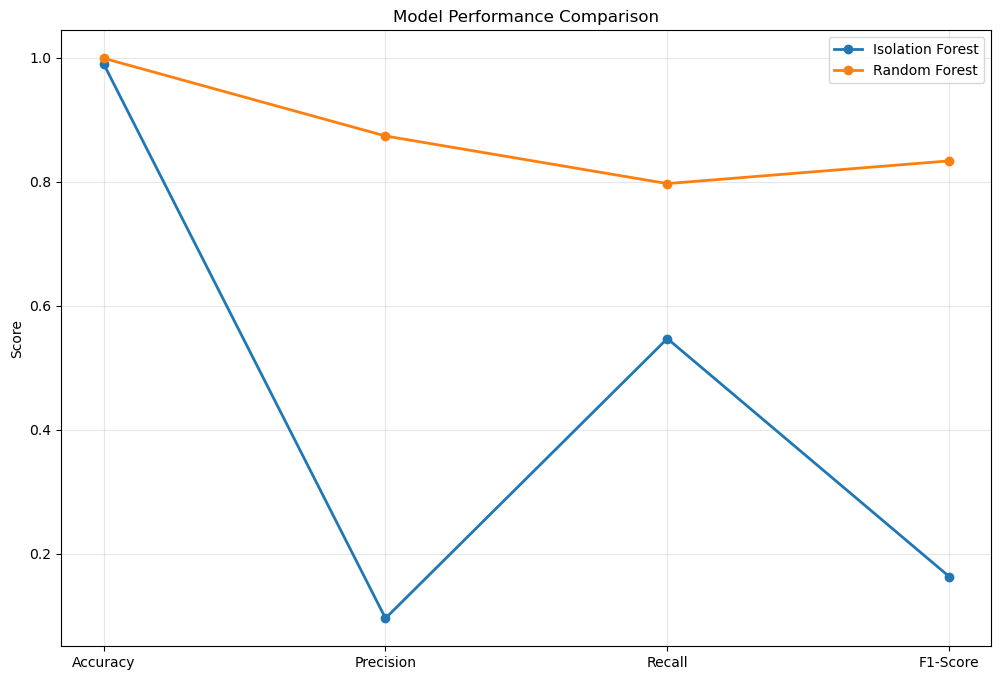

In [37]:
# Visual comparison
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(metrics))

for i, model in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[i][metrics].values
    plt.plot(x_pos, values, marker='o', label=model, linewidth=2)

plt.xticks(x_pos, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# STEP 8: Prepare Data for Power BI Dashboard
def prepare_dashboard_data(df, models_predictions, test_indices):
    """
    Prepare dataset with model predictions for Power BI dashboard
    """
    # Get test data using indices
    test_data = df.iloc[test_indices].copy()

In [44]:
# Define a dictionary to store predictions from all models
models_predictions = {
    'Isolation Forest': np.array(y_pred_iso_binary),   # Binary predictions from Isolation Forest
    'Random Forest': np.array(y_pred_rf)        # Predictions from Random Forest
}

In [45]:
# Confirm that the dictionary is created successfully
print("Models predictions dictionary created successfully!")
print(f"Available models: {list(models_predictions.keys())}")

Models predictions dictionary created successfully!
Available models: ['Isolation Forest', 'Random Forest']


In [46]:
# Check the shape and unique values of each model's predictions
for model_name, preds in models_predictions.items():
    print(f"{model_name}: shape={preds.shape}, unique_values={np.unique(preds)}")


Isolation Forest: shape=(85443,), unique_values=[0 1]
Random Forest: shape=(85443,), unique_values=[0 1]


In [51]:
# Create test_data dataframe from X_test_scaled
test_data = X_test_scaled.copy() 


In [52]:
test_data['Predicted_Isolation_Forest'] = np.array(y_pred_iso_binary)
test_data['Predicted_Random_Forest'] = np.array(y_pred_rf)


In [53]:
# Create a simple Risk Score combining both models
test_data['Risk_Score'] = (
    test_data['Predicted_Isolation_Forest'] + test_data['Predicted_Random_Forest']
) / 2



In [61]:
# Use predictions instead of missing Class column
test_data['Transaction_Type'] = test_data['Predicted_Random_Forest'].map({0: 'Normal', 1: 'Fraud'})



In [73]:

# Step 1: Prepare test indices
_, test_indices = train_test_split(df.index, test_size=0.3, random_state=42, stratify=y)


# Step 2: Create test_data dataframe
-
test_data = df.loc[test_indices].copy()


# Step 3: Add model predictions

models_predictions = {
    'Isolation Forest': np.array(y_pred_iso_binary),
    'Random Forest': np.array(y_pred_rf)
}

for model_name, preds in models_predictions.items():
    col_name = f'Predicted_{model_name.replace(" ", "_")}'
    test_data[col_name] = preds

-
# Step 4: Create Risk Score

test_data['Risk_Score'] = (
    test_data['Predicted_Isolation_Forest'] + test_data['Predicted_Random_Forest']
) / 2

# Step 5: Assign Risk Levels

test_data['Risk_Level'] = pd.cut(
    test_data['Risk_Score'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Low', 'Medium', 'High']
)


# Step 6: Dashboard features

# Hour (if Time column exists)
if 'Time' in test_data.columns:
    test_data['Hour'] = (test_data['Time'] // 3600) % 24

# Transaction Type based on Random Forest predictions
test_data['Transaction_Type'] = test_data['Predicted_Random_Forest'].map({0: 'Normal', 1: 'Fraud'})


# Step 7: Check dataframe

test_data.head()

# Step 8: Save CSV for Power BI

test_data.to_csv('fraud_detection_dashboard_data.csv', index=False)
print("✅ Dashboard data saved successfully!")


✅ Dashboard data saved successfully!
